# A Tour of Python Packages for Scientific Computing

## Python Packages and Modules

A [module](https://docs.python.org/3/tutorial/modules.html) is simply a file containing Python code which defines variables, functions and classes, and a [package](https://docs.python.org/3/tutorial/modules.html#packages) is a collection of modules.

Use the keyword [import](https://docs.python.org/3/tutorial/modules.html#more-on-modules) to import a module or packages into your Python environment. We access variables, functions, classes, etc. from a module or package using the dot notation.

See [Mathematical Python](https://www.math.ubc.ca/~pwalls/math-python) for an introduction to Python, SciPy and Jupyter with mathematical applications.

## NumPy, SciPy and Matplotlib

[NumPy](http://www.numpy.org/) is the core numerical computing package in Python. It provides the `ndarray` object which represents vectors, matrices and arrays of any dimension. Every other package we talk about today is built on NumPy and `ndarray`.

[SciPy](https://scipy.org/scipylib/index.html) is a library containing packages for numerical integration, linear algebra, signal processing, and much more.

[Matplotlib](http://matplotlib.org/) is a plotting library.

Let's begin by importing NumPy under the alias `np` and `matplotlib.pyplot` as `plt`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Basic Plotting

The procedure is simple:

* Create a NumPy array of $x$ values
* Use NumPy functions to create an array of $y$ values
* Plot with the command `plt.plot(x,y)`

See [more matplotlib.pyplot commands](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py).

Plot $y = \sin(2 \pi x)$ over the interval $[0,6]$.

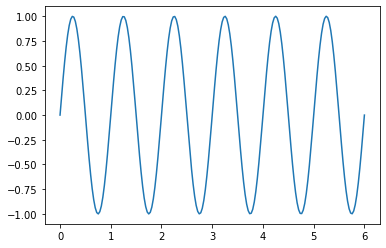

In [2]:
x = np.linspace(0,6,200)
y = np.sin(2*np.pi*x)
plt.plot(x,y)
plt.show()

Plot the parametric curve given by $x = 2 k \cos(t) - a \cos(k t)$, $y = 2 k \sin(t) - a \sin(k t)$ over the interval $t \in [0,2 \pi]$ for different values $a$ and $k$.

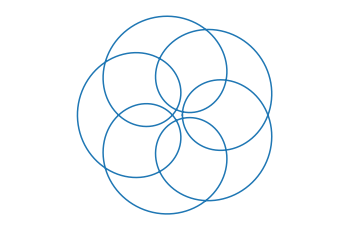

In [3]:
k = 6; a = 11;
t = np.linspace(0,2*np.pi,1000)
x = 2*k*np.cos(t) - a*np.cos(k*t)
y = 2*k*np.sin(t) - a*np.sin(k*t)
plt.plot(x,y)
plt.axis('equal')
plt.axis('off')
plt.show()

### Numerical Integration

The function [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/integrate.html) module computes approximations of definite integrals.

In [4]:
import scipy.integrate as spi

Plot the Gaussian $e^{-x^2}$ over the interval $[-3,3]$ and verify the formula

$$
\int_{-\infty}^{\infty} e^{-x^2} = \sqrt{\pi}
$$

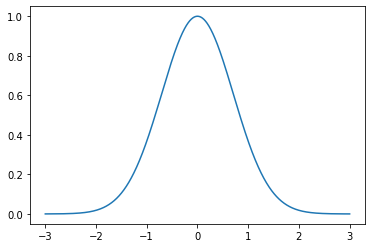

In [5]:
x = np.linspace(-3,3,1000)
y = np.exp(-x**2)
plt.plot(x,y)
plt.show()

Compute the integral and estimate error

In [6]:
I, err = spi.quad(lambda x: np.exp(-x**2),-np.inf,np.inf)
print(I)

1.7724538509055159


Compare to $\sqrt{\pi}$

In [7]:
np.pi**0.5

1.7724538509055159

### Logistic Equation

The function `scipy.integrate.odeint` computes approximations of solutions of differential equations. Plot numerical solutions of the logistic equation $y' = y(1-y)$ for different initial conditions $y(0)$.

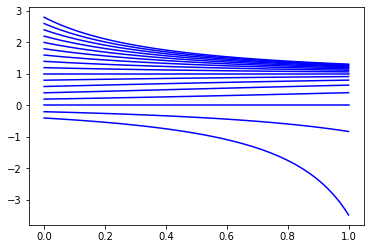

In [8]:
def odefun(y,t):
    return y*(1-y)

t = np.linspace(0,1,100)

for y0 in np.arange(-0.4,3,0.2):
    y = spi.odeint(odefun,y0,t)
    plt.plot(t,y,'b')

### Euler's 3-body Problem

Write a function called `euler3body` which takes input parameters:

* `m1` is the mass of star 1
* `x1` is the position vector of star 1
* `m2` is the mass of star 2
* `x2` is the position vector of star 2
* `u0` is the initial values vector of the planet $[x(0),x'(0),y(0),y'(0)]$
* `tf` is the final time value
* `N` is the number of t values per year (default value `N=100`)

and plots the approximations $x(t)$ versus $y(t)$.

In [9]:
def euler3body(m1,x1,m2,x2,u0,tf,N=100):

    def odefun(u,t):
        G = 4*np.pi**2
        d1 = np.sqrt((u[0] - x1[0])**2 + (u[2] - x1[1])**2)
        d2 = np.sqrt((u[0] - x2[0])**2 + (u[2] - x2[1])**2)
        dudt = np.zeros(4)
        dudt[0] = u[1]
        dudt[1] = -G*(m1*(u[0] - x1[0])/d1**3 + m2*(u[0] - x2[0])/d2**3)
        dudt[2] = u[3]
        dudt[3] = -G*(m1*(u[2] - x1[1])/d1**3 + m2*(u[2] - x2[1])/d2**3)
        return dudt
    
    t = np.linspace(0,tf,100*tf)
    U = spi.odeint(odefun,u0,t)
    plt.plot(U[:,0],U[:,2])
    plt.plot(x1[0],x1[1],'r.',MarkerSize=m1*10)
    plt.plot(x2[0],x2[1],'r.',MarkerSize=m2*10)
    plt.axis('equal')
    plt.show()

Test the function with input where we know the output. We can model the orbit of the Earth around the Sun by setting $m_1=1$ and $m_2=0$ with Star 1 at the origin, and $\mathbf{u}_0=[1,0,0,2\pi]$ to start the planet at 1AU from the Sun and velocity $2\pi$ AU/year to produce a near circular orbit.

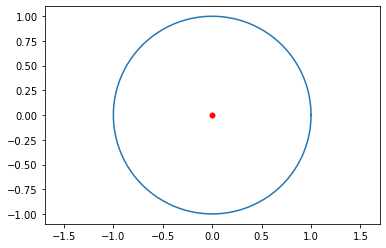

In [10]:
euler3body(1,[0,0],0,[0,0],[1,0,0,2*np.pi],1)

Success! Let's try to create some cool orbits!

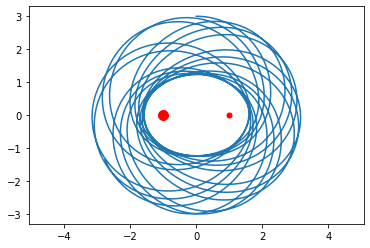

In [11]:
euler3body(2,[-1,0],1,[1,0],[0,5,3,0],30,200)

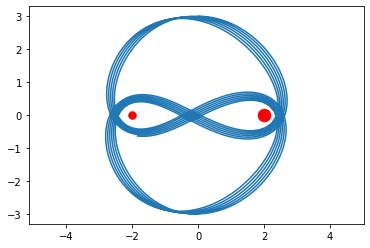

In [12]:
euler3body(1.5,[-2,0],2.5,[2,0],[0,4.8,3,0],20)

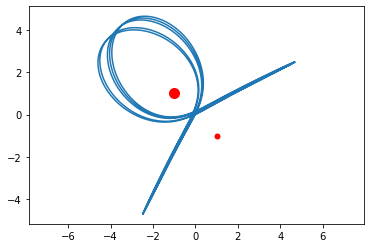

In [13]:
euler3body(2,[-1,1],1,[1,-1],[0,10,0,5],30)

### Image Deblurring

The subpackage [`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html) contains many functions and algorithms for numerical linear algebra.

In [14]:
import scipy.linalg as la

#### Blurring images by Toeplitz matrices

Represent a image as a matrix $X$. Use the function [`scipy.linalg.toeplitz`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.toeplitz.html) to create a Toeplitz matrices $A_c$ and $A_r$. Matrix multiplication on the left $A_c X$ blurs vertically (in the columns) and on the right $X A_r$ blurs horizontally (in the rows).

Start with a simple example. Create an $256 \times 256$ matrix of zeros and ones which represents the image of square.

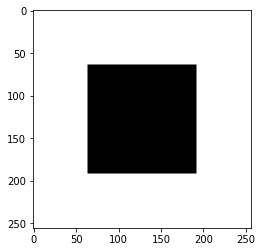

In [15]:
N = 256

Z = np.zeros((N//4,N//4))
O = np.ones((N//4,N//4))
X = np.block([[Z,Z,Z,Z],[Z,O,O,Z],[Z,O,O,Z],[Z,Z,Z,Z]])
plt.imshow(X,cmap='binary')
plt.show()

Create a Toeplitz matrix where the values decrease from the diagonal.

In [16]:
c = np.zeros(N)
s = 5
c[:s] = (s - np.arange(0,s))/(3*s)
Ac = la.toeplitz(c)

Ac[:5,:5]

array([[0.33333333, 0.26666667, 0.2       , 0.13333333, 0.06666667],
       [0.26666667, 0.33333333, 0.26666667, 0.2       , 0.13333333],
       [0.2       , 0.26666667, 0.33333333, 0.26666667, 0.2       ],
       [0.13333333, 0.2       , 0.26666667, 0.33333333, 0.26666667],
       [0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333]])

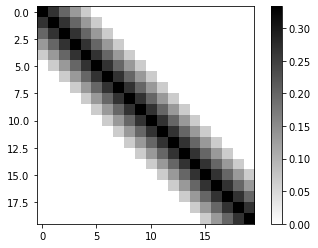

In [17]:
plt.imshow(Ac[:20,:20],cmap='binary')
plt.colorbar()
plt.show()

Check the condition number of $A_c$.

In [18]:
np.linalg.cond(Ac)

24782.33104255917

Blur the image $X$ vertically.

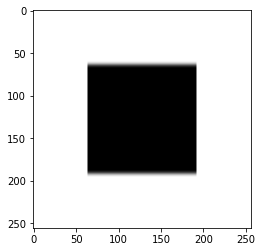

In [19]:
plt.imshow(Ac @ X,cmap='binary')
plt.show()

Do the same but in the horizontal direction.

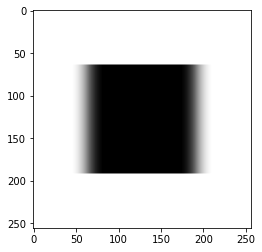

In [20]:
r = np.zeros(N)
s = 20
r[:s] = (s - np.arange(0,s))/(3*s)
Ar = la.toeplitz(r)

plt.imshow(X @ Ar.T,cmap='binary')
plt.show()

Combine both vertical and horizontal blurring.

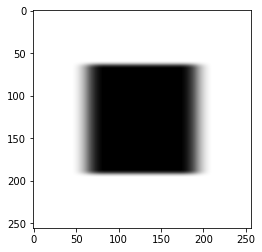

In [21]:
plt.imshow(Ac @ X @ Ar.T,cmap='binary')
plt.show()

#### Inverting the noise

Let $E$ represent some noise in the recording of the blurred image

$$
A_c X A_r^T = B + E
$$

How do we find $X$? Let's do an example with a real picture.

In [22]:
kitten = plt.imread('data/kitten.jpg').astype(np.float64)

kitten[:3,:3]

array([[150., 153., 158.],
       [150., 153., 158.],
       [149., 153., 157.]])

In [23]:
kitten.shape

(256, 256)

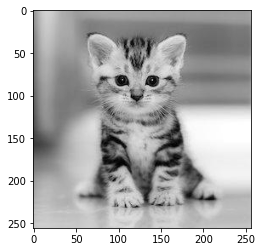

In [24]:
plt.imshow(kitten,cmap='gray')
plt.show()

Add noise to the image.

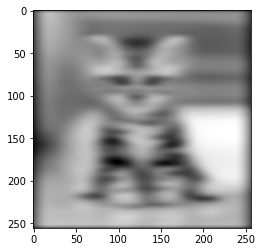

In [25]:
noise = 0.01*np.random.randn(256,256)
B_E = Ac @ kitten @ Ar.T + noise

plt.imshow(B_E,cmap='gray')
plt.show()

Compute the solution directly

$$
X = A_c^{-1} (B + E) ( A_r^T )^{-1}
$$

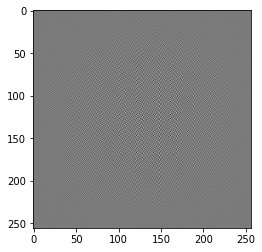

In [26]:
X1 = la.solve(Ac,B_E)
X2 = la.solve(Ar,X1.T)
X2 = X2.T

plt.imshow(X2,cmap='gray')
plt.show()

What happened? We computed

$$
X = A_c^{-1} B ( A_r^T )^{-1} + A_c^{-1} E ( A_r^T )^{-1}
$$

and the result is dominated by the inverted noise $A_c^{-1} E ( A_r^T )^{-1}$.

#### Truncated SVD

We need to avoid inverting the noise therefore we compute using the truncated pseudoinverse

$$
X = (A_c)_k^+ (B + E) (A_r^T)_k^+
$$

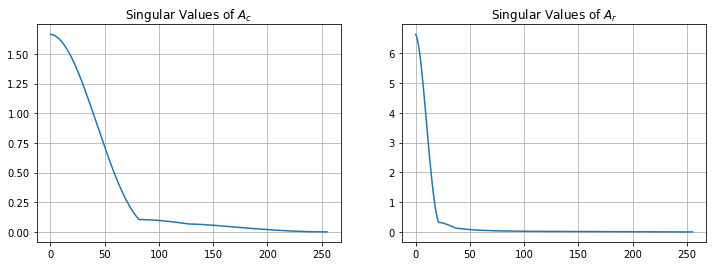

In [27]:
Pc,Sc,QTc = la.svd(Ac)
Pr,Sr,QTr = la.svd(Ar)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(Sc)
plt.grid(True)
plt.title('Singular Values of $A_c$')

plt.subplot(1,2,2)
plt.plot(Sr)
plt.grid(True)
plt.title('Singular Values of $A_r$')
plt.show()

Compute the truncated pseudoinverse by cutting off small singular values.

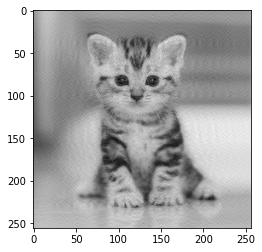

In [28]:
k = 200
Ac_k_plus = QTc[:k,:].T @ np.diag(1/Sc[:k]) @ Pc[:,:k].T
Ar_k_plus = QTr[:k,:].T @ np.diag(1/Sr[:k]) @ Pr[:,:k].T
X = Ac_k_plus @ B_E @ Ar_k_plus
plt.imshow(X,cmap='gray')
plt.show()

We rescued the kitten!

### Computed Tomography

The following example is a tomographic X-ray data of a walnut. The dataset was prepared by the [Finnish Inverse Problems Society](http://www.fips.fi/dataset.php). Import the MATLAB data file with [`scipy.io.loadmat`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html).

In [29]:
from scipy.io import loadmat

In [30]:
data = loadmat('./data/ct.mat')

The data file contains a measurement matrix $A$ and the projections vector $m$. These are large matrices and so we need sparse matrices.

#### Measurement Matrix $A$

In [31]:
A = data['A']
A.data.nbytes

7762752

In [32]:
A.shape

(9840, 6724)

In [33]:
type(A)

scipy.sparse.csc.csc_matrix

Each row of the measurement matrix represents a projection of an X-ray through the sample as a particular angle. WE can visualize each row by reshaping into a matrix.

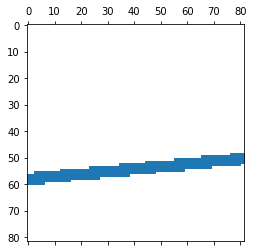

Row:  300


In [34]:
index = 300 #np.random.randint(0,A.shape[0])
proj = A[index,:].reshape(82,82)
plt.spy(proj)
plt.show()
print('Row: ',index)

#### Sinogram: Measured Projections

The vector $m$ is the collection of 82 projections from 120 different angles.

In [35]:
sinogram = data['m']

In [36]:
sinogram.nbytes

78720

In [37]:
sinogram.shape

(82, 120)

In [38]:
type(sinogram)

numpy.ndarray

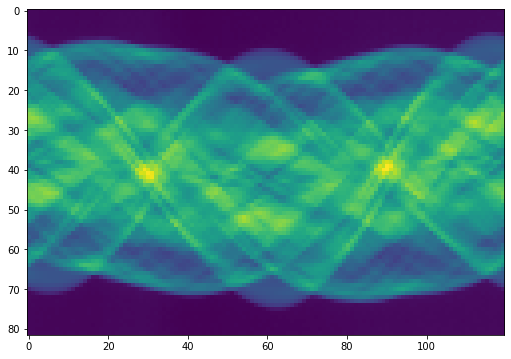

In [39]:
plt.figure(figsize=(10,6))
plt.imshow(sinogram)
plt.show()

#### Compute Truncated SVD Solution

We need to solve $A\mathbf{x} = \mathbf{b}$ (where $\mathbf{b}$ is the vector of projections) however there are errors in the projections vector $\mathbf{b}$ and so we actually have

$$
A \hat{\mathbf{x}} = \mathbf{b} + \mathbf{e}
$$

where $\mathbf{e}$ is noise. We need to compute the truncated pseudoinverse to avoid inverting the noise

$$
\hat{\mathbf{x}} = A_k^+ ( \mathbf{b} + \mathbf{e} )
$$

In [40]:
b = sinogram.reshape([82*120,1],order='F')

We proceed as in the last example but now we need functions for sparse matrices using [`scipy.sparse`](https://docs.scipy.org/doc/scipy/reference/sparse.html).

In [41]:
from scipy.sparse import linalg as sla

Truncate the measurement matrix after the largest $k$ singular values and compute the pseudoinverse.

In [42]:
k = 200
P,S,QT = sla.svds(A,k=k)

In [43]:
P.shape

(9840, 200)

In [44]:
QT.shape

(200, 6724)

In [45]:
A_k_plus = QT.T @ np.diag(1/S) @ P.T
X = A_k_plus @ b

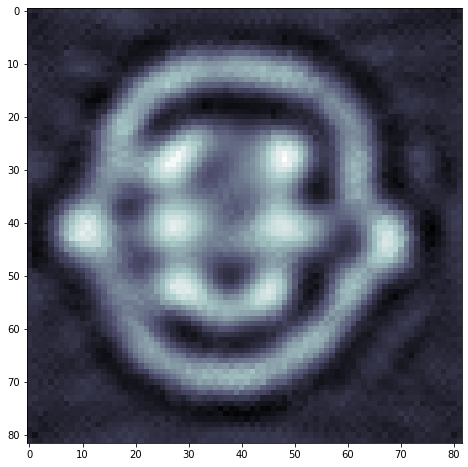

In [46]:
plt.figure(figsize=(8,8))
plt.imshow(X.reshape(82,82).T,cmap='bone')
plt.show()

#### True Solution

Compare to the true solution provided by [FIPS](http://www.fips.fi/dataset.php).

![Solution of Computed Tomorgraphy Example](./data/ct_solution.png)

## pandas

[pandas](https://pandas.pydata.org) is the main Python package for data analysis. Load tabular data with the all important [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function. Let's do an example with Vancouver weather data taken from [Vancouver Weather Statistics](https://vancouver.weatherstats.ca/download.html).

In [47]:
import pandas as pd

In [48]:
data = pd.read_csv('./data/weatherstats_vancouver_hourly.csv',
                   parse_dates=['date_time_local'],
                   usecols=[0,2,4,5,6,8,10])

In [49]:
data.head()

,date_time_local,pressure_station,wind_dir,wind_dir_10s,wind_speed,relative_humidity,temperature
0,2020-08-12 08:00:00-07:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-12 07:00:00-07:00,101.48,W,27.0,17.0,77.0,14.3
2,2020-08-12 06:00:00-07:00,101.40,W,27.0,18.0,78.0,13.6
3,2020-08-12 05:00:00-07:00,101.35,W,27.0,21.0,73.0,14.2
4,2020-08-12 04:00:00-07:00,101.30,W,28.0,26.0,71.0,14.5


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype                    
---  ------             --------------  -----                    
 0   date_time_local    15000 non-null  datetime64[ns, tzlocal()]
 1   pressure_station   14999 non-null  float64                  
 2   wind_dir           14823 non-null  object                   
 3   wind_dir_10s       14998 non-null  float64                  
 4   wind_speed         14999 non-null  float64                  
 5   relative_humidity  14998 non-null  float64                  
 6   temperature        14998 non-null  float64                  
dtypes: datetime64[ns, tzlocal()](1), float64(5), object(1)
memory usage: 820.4+ KB


Use the datetime functionality to convert the datetime column into columns with year, month, day and hour.

In [51]:
data['year'] = data['date_time_local'].dt.year
data['month'] = data['date_time_local'].dt.month
data['day'] = data['date_time_local'].dt.day
data['hour'] = data['date_time_local'].dt.hour

Plot the average monthly temparature in 2019.

In [52]:
data2019 = data[data['year'] == 2019]

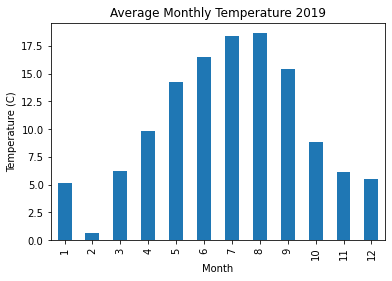

In [53]:
data2019.groupby('month')['temperature'].mean().plot(kind='bar')
plt.title('Average Monthly Temperature 2019')
plt.xlabel('Month'), plt.ylabel('Temperature (C)')
plt.show()

Plot the average hourly wind speed in September 2019.

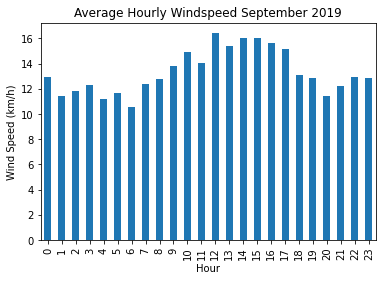

In [54]:
data2019[data2019['month'] == 9].groupby('hour')['wind_speed'].mean().plot(kind='bar')
plt.title('Average Hourly Windspeed September 2019')
plt.xlabel('Hour'), plt.ylabel('Wind Speed (km/h)')
plt.show()

## scikit-learn

[scikit-learn](https://scikit-learn.org/stable/) provides simple implementations of many machine learning algorithms.

### Hand-written digits dataset

scikit-learn comes with builtin datasets for experimentation. Let's import the digits dataset and use the data to create a model which will predict the correct digit for a new image sample.

In [55]:
from sklearn.datasets import load_digits

In [56]:
digits = load_digits()

In [57]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [58]:
images = digits.images

In [59]:
images.shape

(1797, 8, 8)

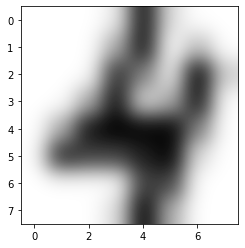

In [60]:
plt.imshow(images[1001,:,:],cmap='binary',interpolation='gaussian')
plt.show()

The `images` array is a 3D array where, for each index `i`, the 2D array `images[i,:,:]` is a numeric array which represents an 8 by 8 pixel image of a hand-written digit.

In [61]:
images[1001,:,:]

array([[ 0.,  0.,  0.,  1., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15.,  0.,  4.,  0.],
       [ 0.,  0.,  0., 13.,  8.,  1., 16.,  3.],
       [ 0.,  0.,  5., 15.,  2.,  5., 15.,  0.],
       [ 0.,  5., 15., 16., 16., 16.,  8.,  0.],
       [ 0., 14., 12., 12., 14., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 12., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  5.,  0.,  0.]])

### K-nearest neighbors classifier

The [K-nearest neighbors classifier](http://scikit-learn.org/stable/modules/neighbors.html#classification) is simple to understand: given our set of known digits as points in 64-dimensional space, look at a new sample as a new points in 64D and look at the labels of the K-nearest points in our training set to predict the correct label.

In [62]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split

In [63]:
clf = KNN(n_neighbors = 10)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [65]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [66]:
clf.score(X_test,y_test)

0.9777777777777777

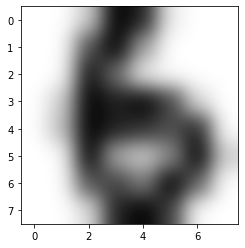

In [67]:
plt.imshow(X_test[10,:].reshape(8,8),cmap='binary',interpolation='gaussian')
plt.show()

In [68]:
clf.predict(X_test[10,:].reshape(1,64))

array([6])

Easy as that! We have a model which is around 97% accurate on our testing data!

### Principal Component Analysis

Each sample in the digits dataset is an 8 by 8 pixel image of a handwritten digit. We represent each image as a vector in 64-dimensional space. Let's use principal component analysis to project that 64-dimensional space of digits down to 2D while preserving as much of the variance in the data as possible.

#### Instantiate a PCA object

[Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) projects the data onto orthogonal components in the feature space so that each component captures the maximum amount of variance. We'll apply PCA to the digits dataset and observe the results and then we'll do the computation for ourselves to see what's going on under the hood.

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components=2) # We want 2 principal components so that we can plot the dataset in 2D

#### Compute the principal components

In [71]:
pca.fit(digits.data)

PCA(n_components=2)

The model has computed the 2 principal components. What are they? They are vectors in the feature space. In other words, they are 8 by 8 pixel images. What do they look like? We can access the components using the `.components_` attribute.

In [72]:
pca.components_.shape

(2, 64)

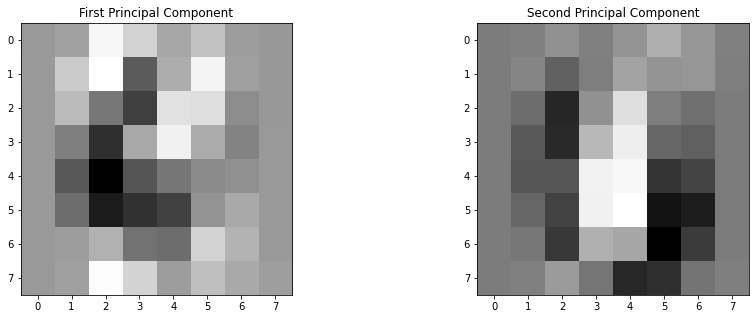

In [73]:
p1 = pca.components_[0,:] # First principal component
p2 = pca.components_[1,:] # Second principal component
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(p1.reshape(8,8),cmap='binary'), plt.title('First Principal Component')
plt.subplot(1,2,2)
plt.imshow(p2.reshape(8,8),cmap='binary'), plt.title('Second Principal Component')
plt.show()

This means that our PCA object is now equipped to project each image onto these two principal components. Looking at the 2 principal components, we can see that the best 2D representation of the dataset is the result of how much a digits looks like a 3 and how much it looks like a 0.

#### Visualizing the digits dataset

Now we can apply the `.transform` method to whole dataset and plot the result.

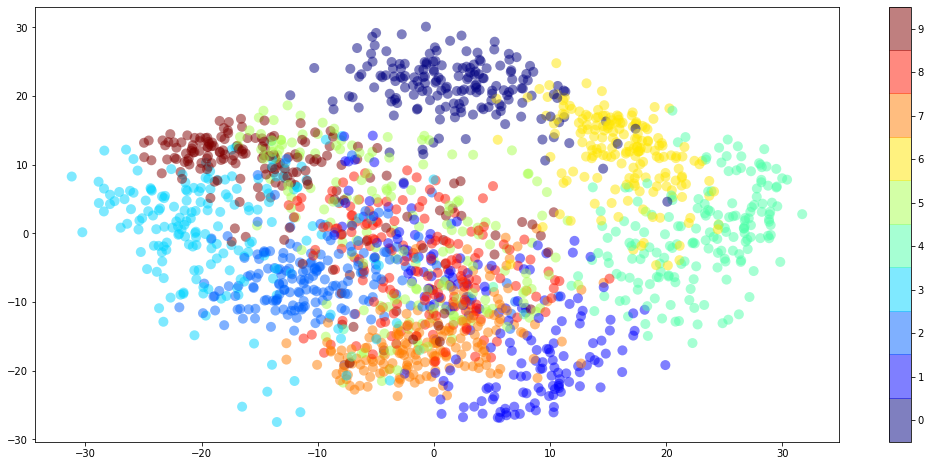

In [74]:
digits_2D = pca.transform(digits.data)

plt.figure(figsize=(18,8))

plt.scatter(digits_2D[:,0],digits_2D[:,1],c=digits.target,s=100,alpha=0.5,lw=0,cmap=plt.cm.get_cmap('jet', 10));
plt.colorbar(ticks=range(0,10)); plt.clim([-0.5,9.5]);
plt.show()

Notice how all the 3s are to the left along the horizontal axis. This is because the first principal component is a 3 **except with the colors inverted**. Similarly, the 0s are at the bottom along the vertical axis because the second principal component is a 0 **again with the colors inverted**. 

## NetworkX

[NetworkX](https://networkx.github.io) is a Python package for network analysis. Let's create a random directed graph and compute the [PageRank](https://en.wikipedia.org/wiki/PageRank) of each node.

In [75]:
import networkx as nx

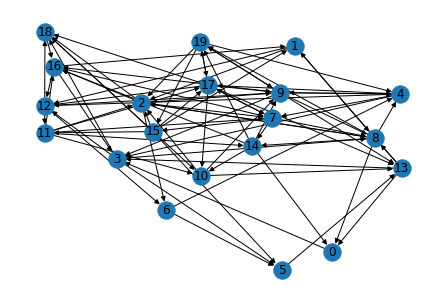

In [76]:
n_pages = 20
n_links = 100
edges = [(np.random.randint(n_pages),np.random.randint(n_pages)) for _ in range(0,n_links)]
G = nx.DiGraph(edges)
nx.draw(G,pos=nx.spring_layout(G),with_labels=True)

In [77]:
ranks = nx.pagerank(G)

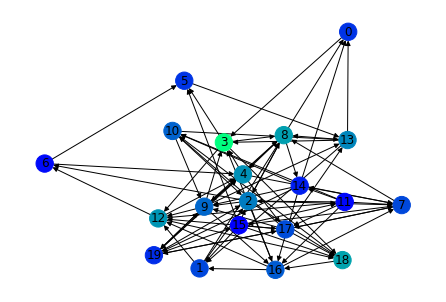

In [78]:
nx.draw(G,node_color=list(ranks.values()),cmap='winter',with_labels=True)

In [79]:
ranks

{2: 0.05941079324233382,
 9: 0.053239324982594004,
 14: 0.031844332380487374,
 16: 0.04972499670672889,
 0: 0.03807835383812704,
 1: 0.04395873412268251,
 12: 0.06667910909240474,
 6: 0.026049482809646494,
 8: 0.06987421585698585,
 19: 0.03607150212955558,
 11: 0.025154300915173407,
 3: 0.0979795105114716,
 5: 0.03849208585645308,
 13: 0.0625241005783428,
 4: 0.0655206047501731,
 17: 0.04531601265669833,
 10: 0.05188690944118463,
 7: 0.044288882522378316,
 15: 0.023043554236682952,
 18: 0.07086319336989559}